# Recurrent Neural Network

In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## function for variables

In [9]:
def init_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.01))

## function for model construction

# 보조 function
## tf.transpose(a, perm)
* permute dimensions (축 바꾸기)

## tf.reshape(tensor, shape)
* reshape tensor into different(lower) dimensions

## tf.split(split_dim, num_split, value)
* split value along dimension split_dim into num_split tensors

# RNN 관련 function 및 object
## tf.nn.rnn_cell.BasicLSTMCell(num_units, forget_bias =1.0, activation = tanh)
* num_units: LSTM cell 안의 unit의 개수
* RNN cell 을 tf.nn.rnn에 넣어서 RNN을 구현

## tf.nn.rnn(cell, inputs)
* cell: An instance of RNNCell.
* inputs: A length T list of inputs, each a Tensor of shape [batch_size, input_size], or a nested tuple of such elements.
### returns (outputs, state)
* outputs: length T의 output 값들의 list
* state: 마지막 cell의 state 값

In [32]:
def model(X, W, B, lstm_size):
    # X, input shape: (batch_size, time_step_size, input_vec_size)
    XT = tf.transpose(X, [1, 0, 2])  # permute time_step_size and batch_size
    # XT shape: (time_step_size, batch_size, input_vec_size)
    XR = tf.reshape(XT, [-1, lstm_size]) # each row has input for each lstm cell (lstm_size=input_vec_size)
    # XR shape: (time_step_size * batch_size, input_vec_size)
    X_split = tf.split(0, time_step_size, XR) # split them to time_step_size (28 arrays)
    # Each array shape: (batch_size, input_vec_size)

    # Make lstm with lstm_size (each input vector size)
    lstm = tf.nn.rnn_cell.BasicLSTMCell(lstm_size, forget_bias=1.0)

    # Get lstm cell output, time_step_size (28) arrays with lstm_size output: (batch_size, lstm_size)
    outputs, _states = tf.nn.rnn(lstm, X_split, dtype=tf.float32)

    # Linear activation
    # Get the last output
    return tf.matmul(outputs[-1], W) + B

## Preparing data

In [33]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
X_trn, Y_trn, X_test, Y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
X_trn = X_trn.reshape(-1, 28, 28)  
X_test = X_test.reshape(-1, 28, 28)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [34]:
type(X_trn)

numpy.ndarray

## make placeholder for inputs and labels

In [35]:
X = tf.placeholder(tf.float32, [None, 28, 28])
Y = tf.placeholder(tf.int32, [None])

## weight variable 와 Model 만들기
### LSTM 에서 나온 output을 class 개수에 대해서 project하는 weight variable

In [36]:
lstm_size = 28 #number of cells in the LSTM
time_step_size = 28

W = init_weights([lstm_size, 10])
B = init_weights([10])

py_x = model(X, W, B, lstm_size)

ValueError: Over-sharing: Variable RNN/BasicLSTMCell/Linear/Matrix already exists, disallowed. Did you mean to set reuse=True in VarScope?

## loss function

In [20]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(py_x, Y))

NameError: name 'py_x' is not defined

## Training operator
#### tf.train.AdagradOptimizer

In [8]:
train_op = tf.train.AdagradOptimizer(learning_rate=0.05).minimize(loss)

## Accuracy 계산
### tensorflow를 통해서 accuracy를 계산

In [9]:
correct = tf.nn.in_top_k(py_x, Y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

## Session initialize 및 training

In [13]:
trn_loss_list = list()
test_loss_list = list()
test_accuracy_list = list()
batch_size = 512

with tf.Session() as sess:    
    tf.initialize_all_variables().run()
    for i in range(100):
        trn_loss = 0
        for start, end in zip(range(0, len(X_trn), batch_size), range(batch_size, len(X_trn)+1, batch_size)):
            tmp_loss, _ = sess.run([loss, train_op], feed_dict={X: X_trn[start:end], Y: Y_trn[start:end]})
            trn_loss += tmp_loss
        trn_loss_list.append(trn_loss / (len(X_trn) // batch_size))
        test_loss, test_acc = sess.run([loss, accuracy], feed_dict={X: X_test, Y: Y_test})
        test_loss_list.append(test_loss)
        test_accuracy_list.append(test_acc)            
        print("epoch: {} test accuracy {:0.4f}".format(i, test_acc))

epoch: 0 test accuracy 0.3002
epoch: 1 test accuracy 0.4817
epoch: 2 test accuracy 0.6673
epoch: 3 test accuracy 0.7672
epoch: 4 test accuracy 0.8253
epoch: 5 test accuracy 0.8603
epoch: 6 test accuracy 0.8856
epoch: 7 test accuracy 0.9026
epoch: 8 test accuracy 0.9137
epoch: 9 test accuracy 0.9224
epoch: 10 test accuracy 0.9277
epoch: 11 test accuracy 0.9333
epoch: 12 test accuracy 0.9395
epoch: 13 test accuracy 0.9440
epoch: 14 test accuracy 0.9469
epoch: 15 test accuracy 0.9494
epoch: 16 test accuracy 0.9514
epoch: 17 test accuracy 0.9536
epoch: 18 test accuracy 0.9553
epoch: 19 test accuracy 0.9560
epoch: 20 test accuracy 0.9566
epoch: 21 test accuracy 0.9571
epoch: 22 test accuracy 0.9585
epoch: 23 test accuracy 0.9585
epoch: 24 test accuracy 0.9592
epoch: 25 test accuracy 0.9607
epoch: 26 test accuracy 0.9614
epoch: 27 test accuracy 0.9621
epoch: 28 test accuracy 0.9628
epoch: 29 test accuracy 0.9637
epoch: 30 test accuracy 0.9641
epoch: 31 test accuracy 0.9650
epoch: 32 test acc

## Loss plot

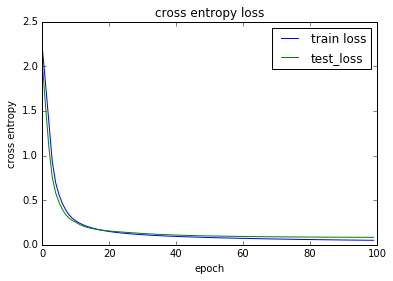

In [14]:
x = np.arange(100)
plt.plot(x, trn_loss_list)
plt.plot(x, test_loss_list)
plt.title("cross entropy loss")
plt.legend(["train loss", "test_loss"])
plt.xlabel("epoch")
plt.ylabel("cross entropy")

## Accuracy plot

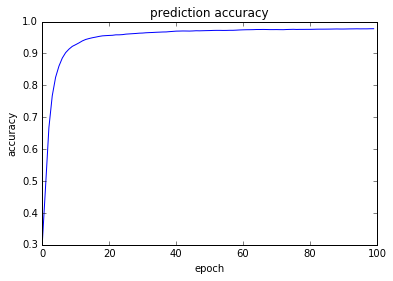

In [15]:
x = np.arange(100)
plt.plot(x, test_accuracy_list)
plt.title("prediction accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")